# 10 Class Diseases Image Classification RGB
## using Convolusion and MaxPooling layers in CNN

In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#import os
#import cv2
from tqdm import tqdm
#import pickle
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D,Conv3D , MaxPooling2D

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#from tqdm import tqdm
#from PIL import ImageEnhance
#from PIL import Image as pil_image
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
import random
from keras.regularizers import l1 , l2
#reg = l1(0.001)
#from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [3]:
#Loading Data file names and lables
train=pd.read_csv('train9.csv')

In [4]:
#image names and lables
print(" image names:    " , train['image_name'].unique(),
      "\n","lable of images:" ,train['lable'].unique())

 image names:     ['T(1)' 'T(2)' 'T(3)' ... 'T(15605)' 'T(15606)' 'T(15607)'] 
 lable of images: [0 1 2 3 4 5 6 7 8 9]


In [5]:
# the number of data in each class
train["lable"].value_counts()

3    3208
2    2127
5    1908
9    1600
8    1600
0    1591
6    1300
4    1000
7     900
1     373
Name: lable, dtype: int64

In [6]:
# list of lables " start from 0 not from 1 "
unique_lable = train['lable'].unique()
print(unique_lable)

[0 1 2 3 4 5 6 7 8 9]


## Load Data

In [7]:
# read all the training images, store them in a list, and convert that list into a numpy array
train_image =[]
for i in  tqdm(range(train.shape[0])):
        img = image.load_img('total_data\\'+'T('+str(i)+')'+'.jpg', target_size=(28,28) )#,color_mode = "grayscale")# grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
       # img = image.load_img('10/'+train['Image_Name'][i]+'.jpg' ,

100%|████████████████████████████████████████████████████████████████████████████| 15607/15607 [06:43<00:00, 38.65it/s]


In [8]:
# append images to 'X' and Lables to 'y'
X = np.array(train_image)
y=train['lable'].values


In [9]:
#Creating a validation set from the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
# the shapes
print("X shape is:          " , X.shape , "\n",
      'X_train shape is:   ' , X_train.shape,"\n",
      'X test shape is    ' , X_test.shape,"\n" ,
      'y_train shape is:   ' ,y_train.shape )

X shape is:           (15607, 28, 28, 3) 
 X_train shape is:    (12485, 28, 28, 3) 
 X test shape is     (3122, 28, 28, 3) 
 y_train shape is:    (12485,)


In [11]:
class_names=['healthy','mosai_virus','bactrial_spot','yellowLeaf_virus','early_blight','late_blight',
            'Target_spot','Leaf_Mold','Septoria_Leaf_Spot','Spider_mites']

In [12]:
# count of each class 
train["lable"].value_counts()

3    3208
2    2127
5    1908
9    1600
8    1600
0    1591
6    1300
4    1000
7     900
1     373
Name: lable, dtype: int64

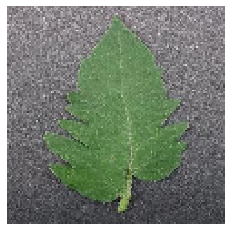

In [302]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[0]
#some_digit_image = some_digit.reshape(120,120)
plt.imshow(some_digit, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

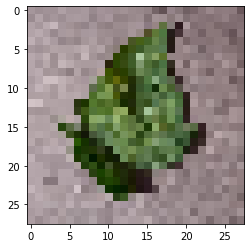

In [14]:
plt.imshow(X_train[3], cmap="binary")
#plt.axis('off')
plt.show()

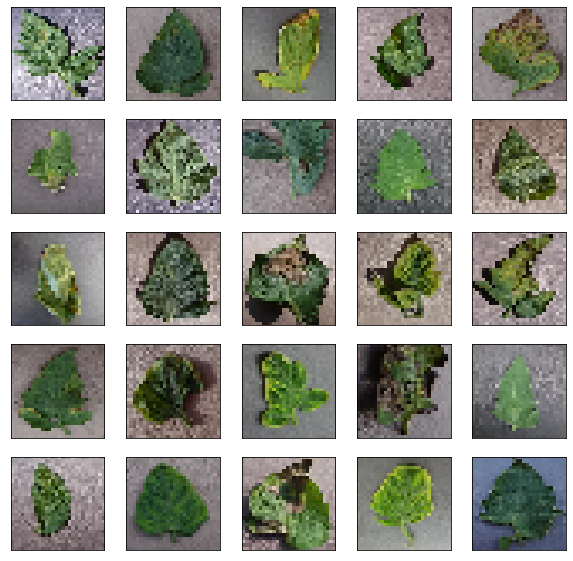

In [59]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [13]:
from tensorflow.keras import datasets, layers, models

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu' , input_shape=(28, 28,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(10, (3, 3), activation='relu'))
#model.add(Dense(10, activation='softmax'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
#compile with loss func 'sparse_categorical_crossentropy' 'adam' is the beter result than 'sgd'
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Set callback functions to early stop training and save the best model 
# keras.callbacks.callbacks.ModelCheckpoint(filepath='best.h5', monitor='val_loss', verbose=0,
                                          # save_best_only=True, mode='auto', period=1)
callback = [EarlyStopping(monitor='val_loss', patience=3 ), 
            ModelCheckpoint(filepath='model_6disease.h5', monitor='val_loss' , save_best_only=True)]

In [18]:
#train the model on the training set images and validate it
checkpoint = keras.callbacks.ModelCheckpoint( filepath='model_6disease.h5', save_best_only=True)
model.fit(X_train, y_train, 
          epochs=5,                   
          callbacks=[checkpoint],         # Early Stopping & checkpoint
          validation_data=(X_test, y_test),  
          batch_size=32)
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

Train on 12485 samples, validate on 3122 samples
Epoch 1/5
12485/12485 [==============================] - 25s 2ms/sample - loss: 0.4939 - accuracy: 0.8308 - val_loss: 0.5686 - val_accuracy: 0.8139
Epoch 2/5
12485/12485 [==============================] - 24s 2ms/sample - loss: 0.4746 - accuracy: 0.8359 - val_loss: 0.4861 - val_accuracy: 0.8360
Epoch 3/5
12485/12485 [==============================] - 23s 2ms/sample - loss: 0.4431 - accuracy: 0.8437 - val_loss: 0.5156 - val_accuracy: 0.8203
Epoch 4/5
12485/12485 [==============================] - 23s 2ms/sample - loss: 0.4088 - accuracy: 0.8584 - val_loss: 0.5340 - val_accuracy: 0.8152
Epoch 5/5
12485/12485 [==============================] - 23s 2ms/sample - loss: 0.4072 - accuracy: 0.8588 - val_loss: 0.4551 - val_accuracy: 0.8398


In [19]:
#model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stopping])

Train on 12485 samples, validate on 3122 samples
Epoch 1/3
12485/12485 [==============================] - 26s 2ms/sample - loss: 0.3740 - accuracy: 0.8684 - val_loss: 0.4471 - val_accuracy: 0.8424
Epoch 2/3
12485/12485 [==============================] - 24s 2ms/sample - loss: 0.3617 - accuracy: 0.8746 - val_loss: 0.4771 - val_accuracy: 0.8418
Epoch 3/3
12485/12485 [==============================] - 24s 2ms/sample - loss: 0.3304 - accuracy: 0.8832 - val_loss: 0.4630 - val_accuracy: 0.8373


In [30]:
#Evaluate with early stopping best patience 5
#model.evaluate(X_test, y_test)

3122/1 - 1s - loss: 0.9593 - accuracy: 0.6883
test accuracy: 0.6883408


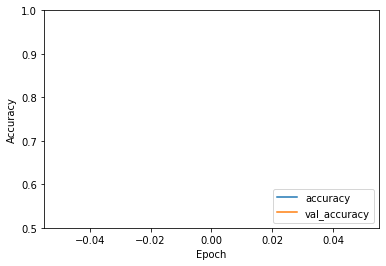

In [78]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print("test accuracy:" ,test_acc)

In [74]:
print(test_acc)

0.6883408


In [20]:
# the result very difrent in size 28*28 vs size 120*120 in this case we see the probably of 1
#نتایج در حالت سایز 100*100 بسیار متفاوت از حالت 28*28 است با افزایش رزولوشن عکس ها احتمال درستی پیش بینی بسیار متفاوت است بطوریکه با احتمال بالا یا 
# یا با احتمال 1 تعلق به هر رده نشان داده میشود
X_new = X_test[:10]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.03, 0.01, 0.04, 0.05, 0.2 , 0.3 , 0.12, 0.25],
       [0.  , 0.  , 0.12, 0.88, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.03, 0.97, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.02, 0.34, 0.  , 0.63, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.02, 0.  , 0.02, 0.  , 0.  , 0.95],
       [0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.14, 0.  , 0.  , 0.84]],
      dtype=float32)

In [21]:
y_predict = model.predict_classes(X_new)
y_predict

array([7, 3, 5, 7, 9, 3, 0, 7, 3, 9], dtype=int64)